In [1]:
import os
os.listdir('.')

['911 data set.csv', 'First_portfolio_project.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
%matplotlib inline
#don't want to use plt.show() every time

In [7]:
dataframe= pd.read_csv('./911 data set.csv')

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [11]:
#checking the top 5 rows of the dataframe
dataframe.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [14]:
#top 5 zipcodes for 911 calls
dataframe['zip'].value_counts().head(5)

zip
19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
Name: count, dtype: int64

In [20]:
#top 5 townships for 911 calls
dataframe['twp'].value_counts().head(7)

twp
LOWER MERION      22886
ABINGTON          16379
NORRISTOWN        15421
UPPER MERION      14015
CHELTENHAM        12272
POTTSTOWN         11198
UPPER MORELAND     9023
Name: count, dtype: int64

In [22]:
#number of unique title cases
dataframe['title'].nunique()

130

In [ ]:
#we can use .apply() method to create a new column called 'specific_reason' which will contain the reason for the 911 call, which is the string after the colon in the title column.
dataframe['specific_reason']=dataframe['title'].apply(lambda title:title.split(':')[1])

In [27]:
dataframe.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [29]:
dataframe['specific_reason'].value_counts().head(5)

specific_reason
 VEHICLE ACCIDENT -       62218
 DISABLED VEHICLE -       18923
 VEHICLE ACCIDENT         15411
 FIRE ALARM               15143
 RESPIRATORY EMERGENCY    13504
Name: count, dtype: int64

In [30]:
def extract_brode_reason(title):
    return title.split(":")[0]
    
dataframe['Brode_reason']=dataframe['title'].apply(extract_brode_reason)

In [34]:
dataframe.head()
#print(dataframe['Brode_reason'].value_counts())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_reason,Brode_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [35]:
print(dataframe['Brode_reason'].value_counts())

Brode_reason
EMS        133234
Traffic     93400
Fire        39909
Name: count, dtype: int64


<Axes: xlabel='Brode_reason', ylabel='count'>

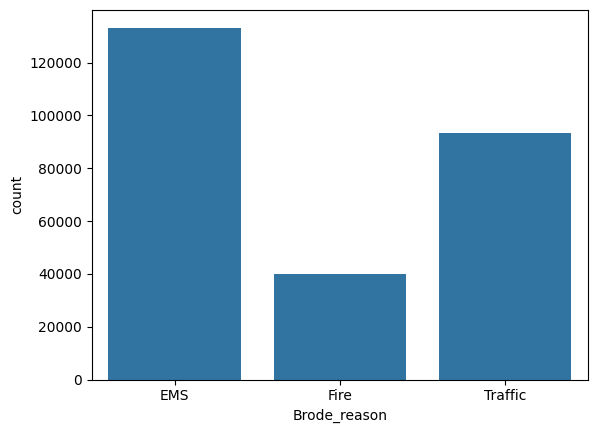

In [ ]:
#plotting the countplot for Brode_reason
sns.countplot(x='Brode_reason',data=dataframe)

In [40]:
#we have a column called 'timeStamp' which contains the time of the 911 call in string format. We need to convert it to datetime format using pd.to_datetime() method.
type(dataframe['timeStamp'].iloc[0])

str

In [ ]:
#converting the timeStamp column(str) to datetime format
dataframe['timeStamp']=pd.to_datetime(dataframe['timeStamp'])

In [42]:
type(dataframe['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#creating new columns for month, day of week and hour from the timeStamp column
dataframe['hour']=dataframe['timeStamp'].apply( lambda time:time.hour)

In [45]:
dataframe.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_reason,Brode_reason,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16


In [51]:
dataframe['month']=dataframe['timeStamp'].apply(lambda time: time.month)
dataframe['day_of_week']=dataframe['timeStamp'].apply(lambda time :time.dayofweek)
dataframe.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_reason,Brode_reason,hour,month,day_of_week,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3,3


In [54]:
print(dataframe['day_of_week'].nunique())
print(dataframe['month'].nunique())

7
12


<Axes: xlabel='month', ylabel='count'>

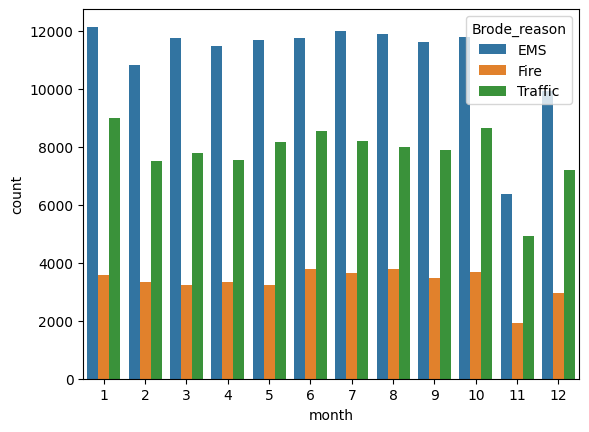

In [ ]:
#plotting the countplot for month with hue as Brode_reason
sns.countplot(x='month',data=dataframe,hue='Brode_reason')

In [57]:
#useing groupby to create a new dataframe called by_month which contains the count of 911 calls per month.
by_month=dataframe.groupby('month').count()

In [61]:
by_month.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific_reason,Brode_reason,hour,day_of_week,day
month,,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001,23001


<Axes: xlabel='month'>

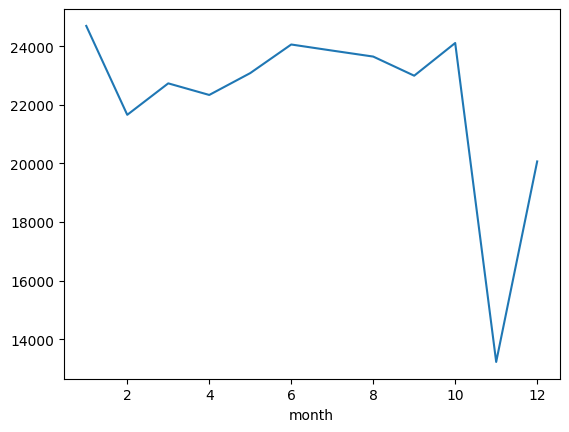

In [63]:
by_month['twp'].plot()

In [71]:
by_day=dataframe.groupby('day_of_week').count()

<Axes: xlabel='day_of_week'>

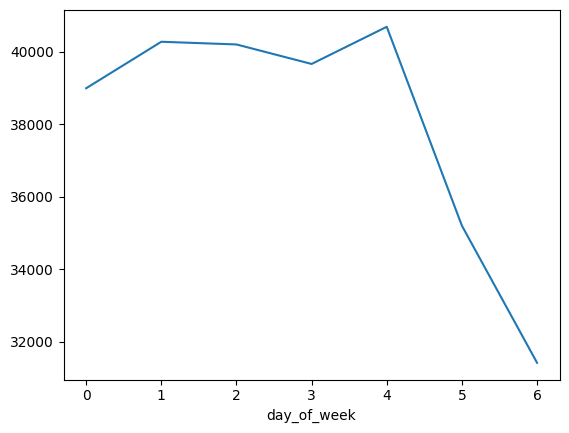

In [72]:
by_day['twp'].plot()